In [127]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### ANALYSIS OF MTA SUBWAY AND WEATHER (2020-2024) ###



## MTA EDA ##

In [128]:
mta_metrics = pd.read_csv('data/MTA_Subway_Customer_Metrics_2020-2024.csv')

In [129]:
mta_metrics.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [130]:
print(mta_metrics.describe())
print(type(mta_metrics['month'][0]))

       num_passengers  additional platform time  additional train time  \
count    2.856000e+03               2856.000000            2856.000000   
mean     2.188061e+06                  1.251518               0.276823   
std      1.450171e+06                  0.454368               0.482434   
min      3.017300e+03                 -0.431496              -2.213688   
25%      1.091265e+06                  0.962920               0.024190   
50%      2.049147e+06                  1.223633               0.339261   
75%      3.184311e+06                  1.540595               0.598394   
max      8.923406e+06                  3.506892               1.584780   

          total_apt     total_att  over_five_mins  over_five_mins_perc  \
count  2.856000e+03  2.856000e+03    2.856000e+03          2856.000000   
mean   2.903727e+06  9.339990e+05    3.404776e+05             0.145785   
std    2.065435e+06  1.258208e+06    2.435442e+05             0.059847   
min   -7.396448e+03 -3.060992e+06    

In [131]:
mta_metrics['month'] = pd.to_datetime(mta_metrics['month'], format='%Y-%m-%d')


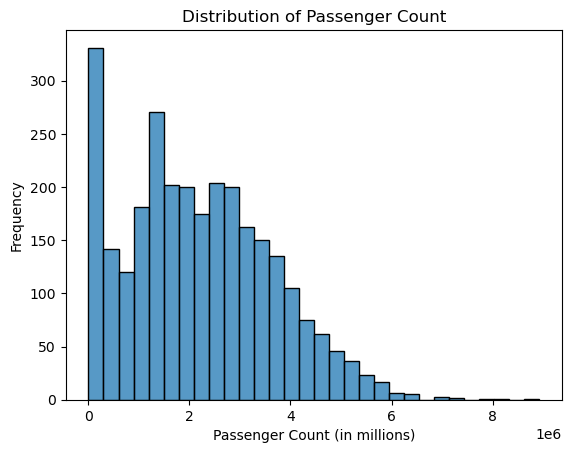

In [132]:
sns.histplot(mta_metrics['num_passengers'], bins=30)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count (in millions)')
plt.ylabel('Frequency')
plt.show()

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/3695346204.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mta_metrics, x='month', y='num_passengers', ci=None)


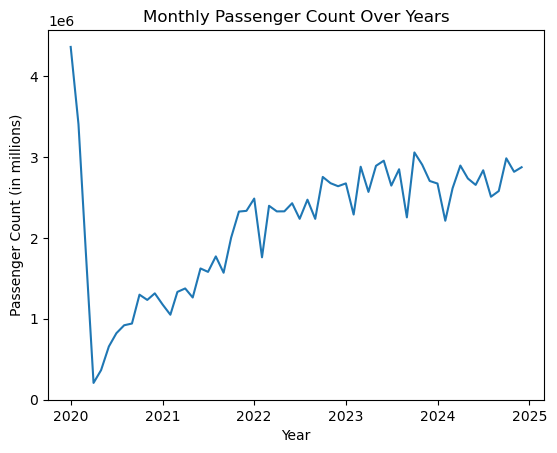

In [133]:
sns.lineplot(data=mta_metrics, x='month', y='num_passengers', ci=None)
plt.title('Monthly Passenger Count Over Years')
plt.xlabel('Year')
plt.ylabel('Passenger Count (in millions)')
plt.show()

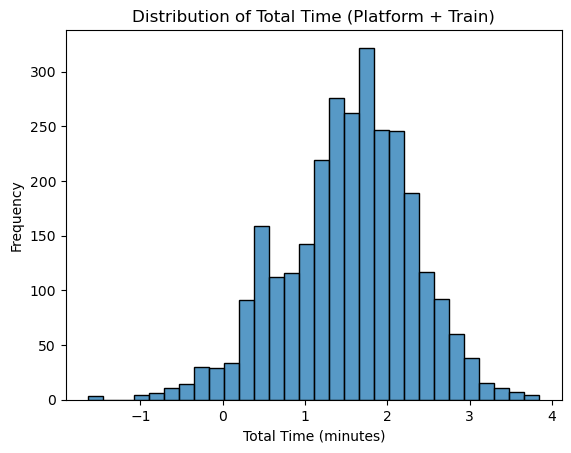

In [134]:
# Combining additional platform time and train time data for analysis

mta_metrics['total_time'] = mta_metrics['additional platform time'] + mta_metrics['additional train time']
sns.histplot(mta_metrics['total_time'], bins=30)
plt.title('Distribution of Total Time (Platform + Train)')
plt.xlabel('Total Time (minutes)')
plt.ylabel('Frequency')
plt.show()

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/1510634235.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mta_metrics, x='month', y='total_time', ci=None)


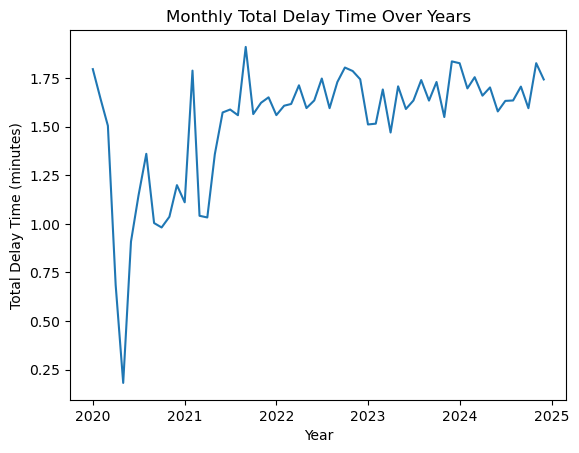

In [135]:
# Plotting the change in total train time over the months

sns.lineplot(data=mta_metrics, x='month', y='total_time', ci=None)
plt.title('Monthly Total Delay Time Over Years')
plt.xlabel('Year')
plt.ylabel('Total Delay Time (minutes)')
plt.show()

## WEATHER EDA ##

In [136]:
weather_A_df = pd.read_csv('data/Jan_2020-Dec_2022_weather.csv')
weather_B_df = pd.read_csv('data/Jan_2023-Dec_2024_weather.csv')

In [137]:
weather_A_df.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,DSND,DSNW,EMNT,...,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,US1NJUN0028,40.708904,-74.321518,37.5,2020-01,NaN,NaN,NaN,NaN,NaN,...,NaN,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,40.708904,-74.321518,37.5,2020-02,NaN,NaN,NaN,NaN,NaN,...,NaN,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,40.708904,-74.321518,37.5,2020-03,NaN,NaN,NaN,NaN,NaN,...,NaN,4.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,40.708904,-74.321518,37.5,2020-04,NaN,NaN,NaN,NaN,NaN,...,NaN,4.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,40.708904,-74.321518,37.5,2020-05,NaN,NaN,NaN,NaN,NaN,...,NaN,2.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
weather_B_df.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,DSND,DSNW,EMNT,...,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,US1NJUN0028,40.708904,-74.321518,37.5,2023-01,NaN,NaN,NaN,NaN,NaN,...,NaN,5.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,40.708904,-74.321518,37.5,2023-02,NaN,NaN,NaN,NaN,NaN,...,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,40.708904,-74.321518,37.5,2023-03,NaN,NaN,NaN,NaN,NaN,...,NaN,3.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,40.708904,-74.321518,37.5,2023-04,NaN,NaN,NaN,NaN,NaN,...,NaN,5.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,40.708904,-74.321518,37.5,2023-05,NaN,NaN,NaN,NaN,NaN,...,NaN,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
weather_df = pd.concat([weather_A_df, weather_B_df])
weather_df.shape

(4847, 24)

In [140]:
weather_df.drop(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION'], axis=1, inplace=True)
weather_df.shape

(4847, 20)

In [141]:
weather_df.isnull().sum()

DATE       0
AWND    4369
CDSD    4007
DSND    3583
DSNW    3375
EMNT    3973
EMSD    3583
EMSN    3375
EMXP     328
EMXT    3973
HDSD    4006
PRCP      19
SNOW    3375
TAVG    3973
TMAX    3973
TMIN    3973
WDF2    4375
WDF5    4375
WSF2    4375
WSF5    4375
dtype: int64

In [142]:
weather_df.drop(['AWND', 'CDSD', 'DSNW', 'EMSD', 'EMSN', 'HDSD', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], axis=1, inplace=True)
weather_df.head()

,DATE,DSND,EMNT,EMXP,EMXT,PRCP,SNOW,TAVG,TMAX,TMIN
0,2020-01,NaN,NaN,1.29,NaN,2.11,NaN,NaN,NaN,NaN
1,2020-02,NaN,NaN,0.59,NaN,3.15,NaN,NaN,NaN,NaN
2,2020-03,NaN,NaN,1.09,NaN,4.03,NaN,NaN,NaN,NaN
3,2020-04,NaN,NaN,0.95,NaN,4.14,NaN,NaN,NaN,NaN
4,2020-05,NaN,NaN,0.59,NaN,2.64,NaN,NaN,NaN,NaN


In [143]:
weather = weather_df.rename(columns={'DSND':'days_snow_on_ground', 'EMNT':'extreme_min_temp', 'EMXP':'extreme_max_precip','EMXT':'extreme_max_temp','PRCP':'precip','SNOW':'snow','TAVG':'avg_temp','TMAX':'max_temp','TMIN':'min_temp'})
weather.isnull().sum()

DATE                      0
days_snow_on_ground    3583
extreme_min_temp       3973
extreme_max_precip      328
extreme_max_temp       3973
precip                   19
snow                   3375
avg_temp               3973
max_temp               3973
min_temp               3973
dtype: int64

In [144]:
weather.fillna(0, inplace=True)

In [145]:
weather.isnull().sum()

DATE                   0
days_snow_on_ground    0
extreme_min_temp       0
extreme_max_precip     0
extreme_max_temp       0
precip                 0
snow                   0
avg_temp               0
max_temp               0
min_temp               0
dtype: int64

In [146]:
# Converting DATE into datetime type

weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.head()

,DATE,days_snow_on_ground,extreme_min_temp,extreme_max_precip,extreme_max_temp,precip,snow,avg_temp,max_temp,min_temp
0,2020-01-01,0.0,0.0,1.29,0.0,2.11,0.0,0.0,0.0,0.0
1,2020-02-01,0.0,0.0,0.59,0.0,3.15,0.0,0.0,0.0,0.0
2,2020-03-01,0.0,0.0,1.09,0.0,4.03,0.0,0.0,0.0,0.0
3,2020-04-01,0.0,0.0,0.95,0.0,4.14,0.0,0.0,0.0,0.0
4,2020-05-01,0.0,0.0,0.59,0.0,2.64,0.0,0.0,0.0,0.0


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/3338247434.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=weather, x="DATE", y="precip", ci=None)


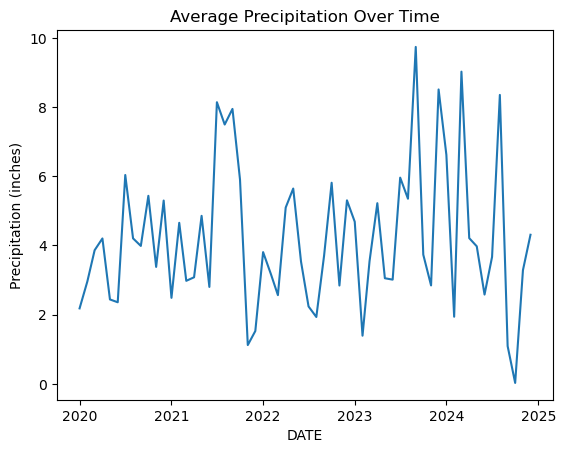

In [147]:
# Plotting precipitation data to make sure it makes sense:

sns.lineplot(data=weather, x="DATE", y="precip", ci=None)

plt.title('Average Precipitation Over Time')
plt.xlabel('DATE')
plt.ylabel('Precipitation (inches)')
plt.show()

<Axes: xlabel='precip', ylabel='Count'>

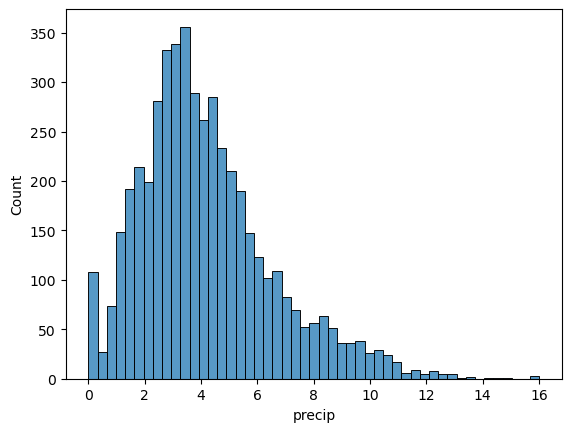

In [148]:
sns.histplot(weather['precip'])

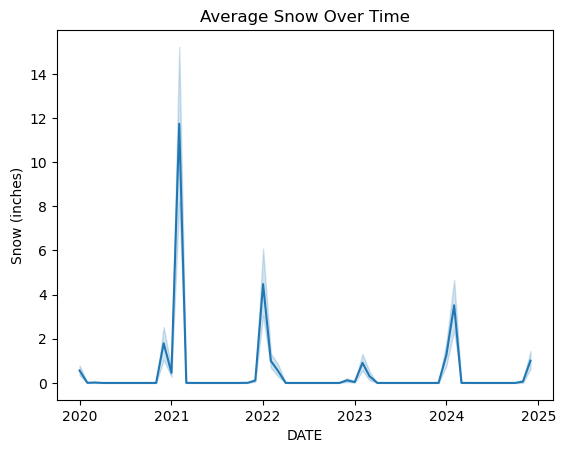

In [149]:
sns.lineplot(data=weather, x="DATE", y="snow")
plt.title('Average Snow Over Time')
plt.xlabel('DATE')
plt.ylabel('Snow (inches)')
plt.show()

In [150]:
temp_data = weather[(weather['avg_temp'] != 0) | (weather['max_temp'] != 0) | (weather['min_temp'] != 0)]
temp_data.describe()

,DATE,days_snow_on_ground,extreme_min_temp,extreme_max_precip,extreme_max_temp,precip,snow,avg_temp,max_temp,min_temp
count,874,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,2022-07-03 01:35:33.638444032,0.607551,35.290618,1.373730,79.339817,4.004668,0.789931,55.746682,64.104577,47.388787
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,26.200000,34.200000,18.100000
25%,2021-04-01 00:00:00,0.000000,23.000000,0.712500,67.000000,2.390000,0.000000,42.325000,50.100000,34.225000
50%,2022-07-01 00:00:00,0.000000,33.000000,1.140000,82.000000,3.740000,0.000000,54.950000,63.850000,46.050000
75%,2023-10-01 00:00:00,0.000000,50.000000,1.730000,91.000000,5.050000,0.000000,69.775000,78.075000,60.900000
max,2024-12-01 00:00:00,28.000000,68.000000,8.590000,103.000000,15.840000,31.700000,82.800000,92.100000,75.200000
std,NaN,2.736288,16.961184,1.095879,13.475109,2.384728,3.392622,15.142806,15.638980,14.781015


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/396578511.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp_data, x='DATE', y='avg_temp', ci=None)


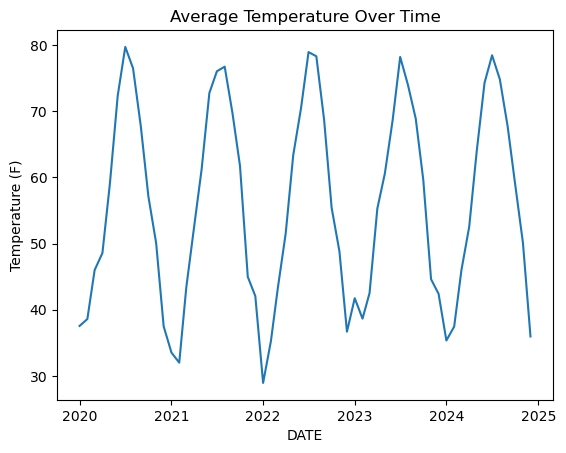

In [151]:
sns.lineplot(data=temp_data, x='DATE', y='avg_temp', ci=None)
plt.title('Average Temperature Over Time')
plt.xlabel('DATE')
plt.ylabel('Temperature (F)')
plt.show()

## COMBINED EDA ##

In [152]:
# Now, let's compare the two datasets to see if there are any correlations between the weather and the number of passengers.

mta_metrics['month'] = pd.to_datetime(mta_metrics['month'], format='%Y-%m-%d')
mta_metrics['month'] = mta_metrics['month'].dt.to_period('M').dt.to_timestamp()


# Merging the two datasets on the month and date columns
merged_data = pd.merge(mta_metrics, weather, left_on='month', right_on='DATE', how='inner')
merged_data.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,...,DATE,days_snow_on_ground,extreme_min_temp,extreme_max_precip,extreme_max_temp,precip,snow,avg_temp,max_temp,min_temp
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.4,...,2024-12-01,0.0,0.0,0.90,0.0,4.81,0.0,0.0,0.0,0.0
1,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.4,...,2024-12-01,3.0,11.0,0.86,65.0,4.39,3.5,37.9,45.0,30.8
2,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.4,...,2024-12-01,2.0,12.0,1.09,60.0,5.07,3.2,39.1,44.5,33.8
3,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.4,...,2024-12-01,0.0,0.0,0.79,0.0,4.22,0.0,0.0,0.0,0.0
4,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.4,...,2024-12-01,0.0,7.0,0.82,61.0,3.73,1.0,34.8,42.8,26.8


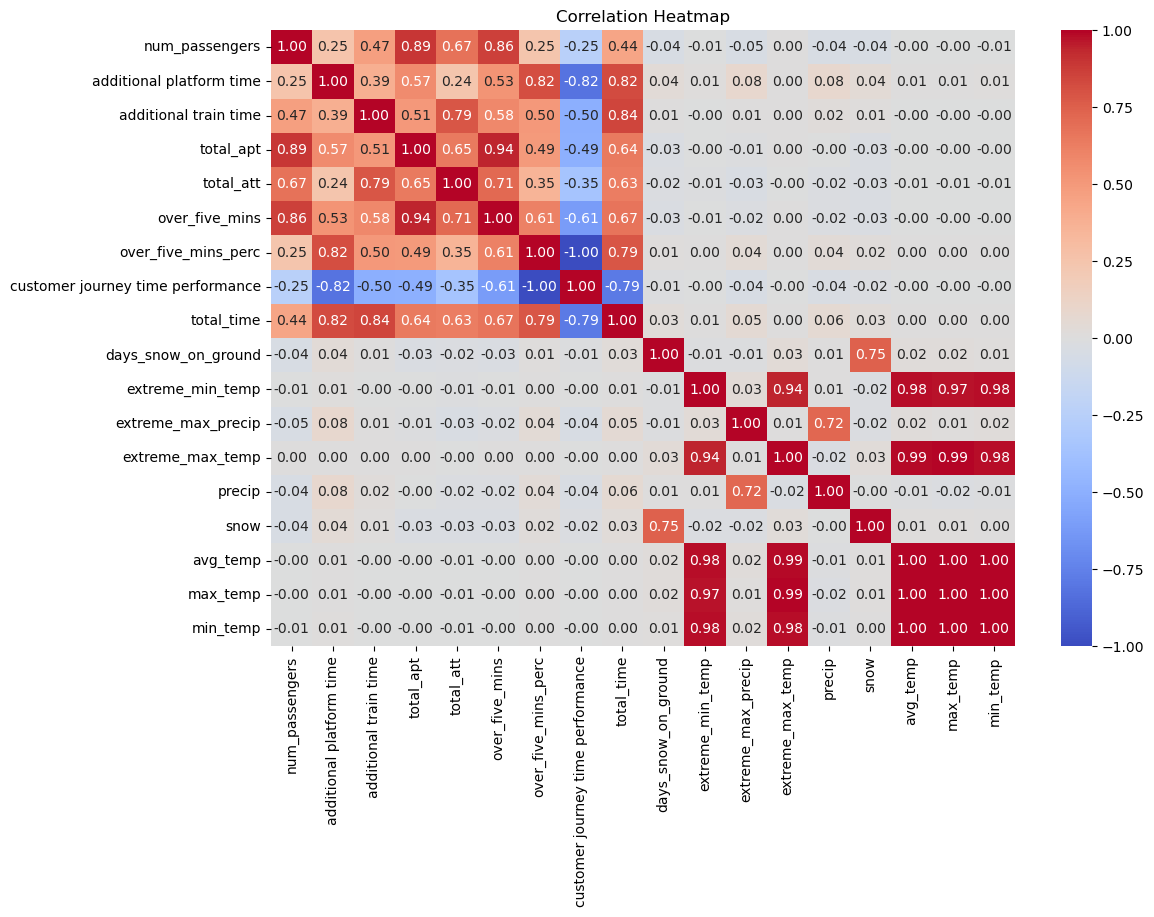

In [153]:
# Using a heatmap to visualize the correlation between the different features

num_merged_data = merged_data[merged_data.select_dtypes(include=[np.number]).columns]

plt.figure(figsize=(12, 8))
sns.heatmap(num_merged_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [157]:
# There does not seem to be a strong correlation between weather and total train time, but let's see if trains that are primarily above ground are affected by weather more than those that are underground.

# First, we need to create a new column in the mta_metrics dataframe that indicates whether the train is above ground or underground.
# For this example, let's assume that the train lines 'A', 'J/Z', 'L', 'M', '7', 'S' are above ground, while the rest are underground.

above_ground_lines = ['A', 'J/Z', 'L', 'M', '7', 'S']
merged_data['above_ground'] = merged_data['line'].apply(lambda x: 1 if x in above_ground_lines else 0)

# Now, let's split the merged data into two separate dataframes: one for above ground trains and one for underground trains.
above_ground_data = merged_data[merged_data['above_ground'] == 1]
underground_data = merged_data[merged_data['above_ground'] == 0]

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/1401851661.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=above_ground_data, x='month', y='total_time', label='Above Ground', ci=None)
/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/1401851661.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=underground_data, x='month', y='total_time', label='Underground', ci=None)


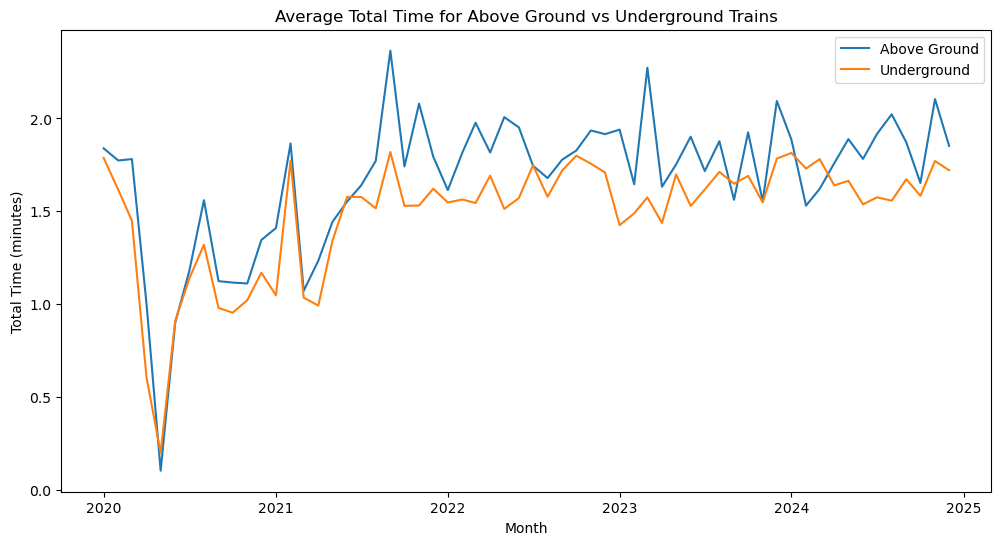

In [169]:
# Next, we can plot the average total time for both above ground and underground trains over the months to see if there are any significant differences.
plt.figure(figsize=(12, 6))
sns.lineplot(data=above_ground_data, x='month', y='total_time', label='Above Ground', ci=None)
sns.lineplot(data=underground_data, x='month', y='total_time', label='Underground', ci=None)
plt.title('Average Total Time for Above Ground vs Underground Trains')
plt.xlabel('Month')
plt.ylabel('Total Time (minutes)')
plt.legend()
plt.show()

In [163]:
# We can see that there is a noticeable difference in the average total time for above ground and underground trains.
# To show just how much of an effect various weather conditions have on the above ground trains, we can compare the monthly average total time for above ground trains during the months with the most snow and rain to the months with the least snow and rain.

# First, let's find the months with the most and least snow and rain.
most_snow_month = merged_data.loc[merged_data['snow'].idxmax()]['DATE']
least_snow_month = merged_data.loc[merged_data['snow'].idxmin()]['DATE']
most_rain_month = merged_data.loc[merged_data['precip'].idxmax()]['DATE']
least_rain_month = merged_data.loc[merged_data['precip'].idxmin()]['DATE']

print(f'Most Snow Month: {most_snow_month}')
print(f'Least Snow Month: {least_snow_month}')
print(f'Most Rain Month: {most_rain_month}')
print(f'Least Rain Month: {least_rain_month}')

# Now, let's filter the above ground data to only include these months.
above_ground_snow_data = above_ground_data[(above_ground_data['month'] == most_snow_month) | (above_ground_data['month'] == least_snow_month)]
above_ground_rain_data = above_ground_data[(above_ground_data['month'] == most_rain_month) | (above_ground_data['month'] == least_rain_month)]

Most Snow Month: 2021-02-01 00:00:00
Least Snow Month: 2024-12-01 00:00:00
Most Rain Month: 2023-09-01 00:00:00
Least Rain Month: 2024-12-01 00:00:00


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/1170337592.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=above_ground_data, x='month', y='total_time', label='Above Ground', ci=None)


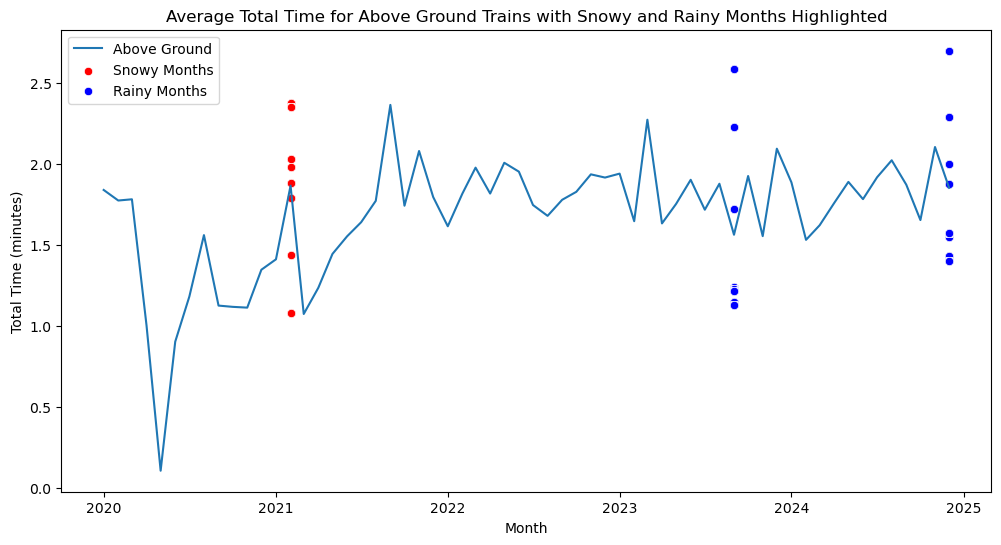

In [177]:
# Next, we can show in our earlier plot the points for the months with the most and least snow and rain.

above_ground_snow_highlight = pd.merge(above_ground_snow_data, above_ground_data, on=['month', 'total_time'], how='inner')
above_ground_rain_highlight = pd.merge(above_ground_rain_data, above_ground_data, on=['month', 'total_time'], how='inner')

# Plotting the average total time for above ground trains with the snowy and rainy months highlighted



plt.figure(figsize=(12, 6))
sns.lineplot(data=above_ground_data, x='month', y='total_time', label='Above Ground', ci=None)
sns.scatterplot(data=above_ground_snow_highlight, x='month', y='total_time', color='red', label='Snowy Months')
sns.scatterplot(data=above_ground_rain_highlight, x='month', y='total_time', color='blue', label='Rainy Months')
plt.title('Average Total Time for Above Ground Trains with Snowy and Rainy Months Highlighted')
plt.xlabel('Month')
plt.ylabel('Total Time (minutes)')
plt.legend()
plt.show()
